In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 20]

#### О пользователях

### users.csv:
* user_id – уникальный идентификатор пользователя
* sex – указанный пользователем пол в анкете
* age – указанный пользователем в анкете возраст пользователя. 0 – не указан.
* city_id - указанный пользователем в анкете город проживания. 0 – не указан.

In [22]:
users = pd.read_csv('users.csv', sep=',')
print(f'dataset shape: {users.shape}')
users.head(7)

dataset shape: (27769, 4)


,user_id,sex,age,city_id
0,0,2,19,0
1,1,1,0,1
2,2,2,24,2
3,3,1,20,3
4,4,2,29,4
5,5,2,22,5
6,6,1,21,6


<AxesSubplot:>

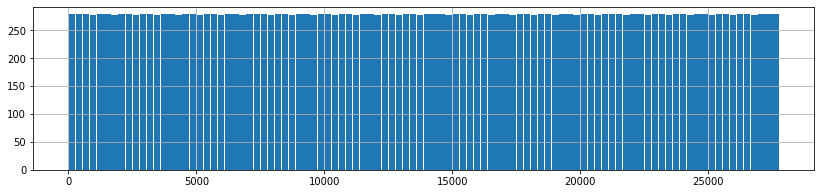

In [23]:
# Пользователи с какими id есть в данных?

users.user_id.hist(bins=100, rwidth=0.9)

<AxesSubplot:>

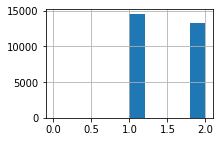

In [24]:
# Пол пользователей

users.sex.hist(figsize=(3, 2))

In [25]:
(users[users.sex < 1]).shape[0] # без пола

30

<AxesSubplot:>

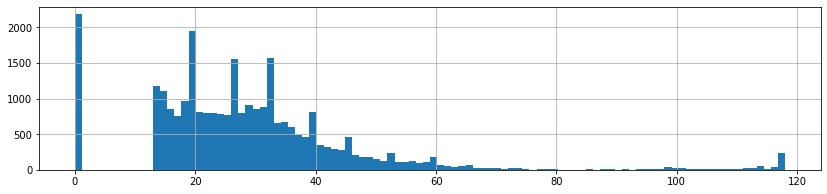

In [26]:
# Возраст

users.age.hist(bins=100)  #Много пустых данных

<AxesSubplot:>

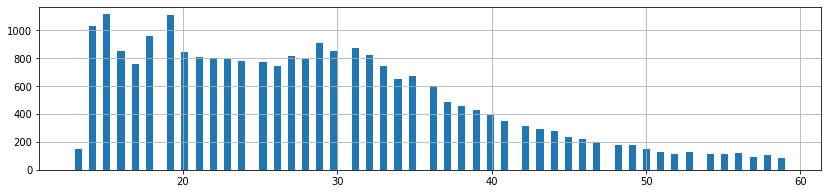

In [27]:
# Возраст основной аудитории

users[(users.age > 0) & (users.age < 60)].age.hist(bins=100)

Количество городов: 2457


<AxesSubplot:>

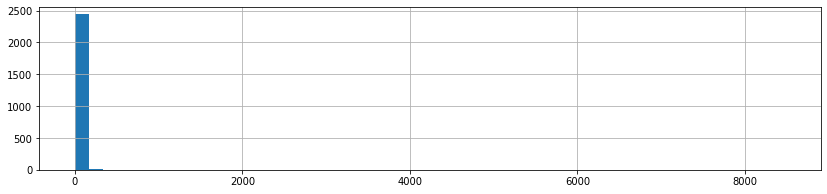

In [28]:
# Города пользователей

print(f'Количество городов: {len(users.city_id.unique())}')
# Сколько пользователей в каждом городе
vc = users.value_counts('city_id')
vc.hist(bins=50)

In [29]:
vc

city_id
0       8479
3       1985
7       1232
25       315
19       308
        ... 
729        1
1509       1
1508       1
730        1
2456       1
Length: 2457, dtype: int64

<AxesSubplot:>

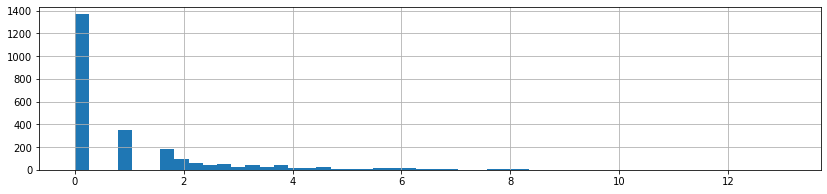

In [30]:
# Логарифмированное количество жителей городов
log2_vc = np.log2(vc)
log2_vc.hist(bins=50)

In [31]:
log2_vc

city_id
0       13.049678
3       10.954923
7       10.266787
25       8.299208
19       8.266787
          ...    
729      0.000000
1509     0.000000
1508     0.000000
730      0.000000
2456     0.000000
Length: 2457, dtype: float64

##### Менее тривиальные графики

<AxesSubplot:>

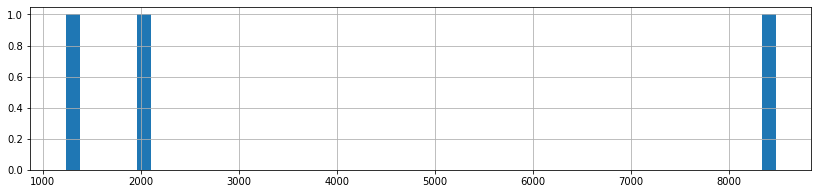

In [32]:
# Города с населением более 1к
vc[vc > 1000].hist(bins=50)

In [33]:
# Исследуем жителей больших городов
vc[vc > 1000]

city_id
0    8479
3    1985
7    1232
dtype: int64

In [34]:
cities_users = users[users.city_id.isin([0, 3, 7])]
cities_users.shape

(11696, 4)

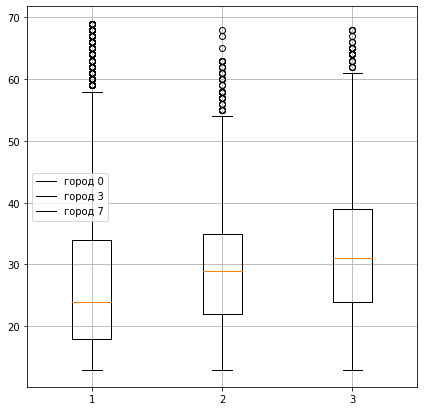

In [35]:
# Их возраст по городам

city_ages = cities_users[(cities_users.age > 0) & (cities_users.age < 70)].groupby('city_id').age.apply(list)

plt.figure(figsize=(7, 7))
plt.boxplot(city_ages)
plt.grid(True)
plt.legend([f'город {city_id}' for city_id in city_ages.index])
plt.show()

#### О рекламных компаниях

### history.csv:
* hour – в какой час пользователь видел объявление
* cpm - цена показанного рекламного объявления в рекламном аукционе. Это значит, что на данном аукционе это была максимальная ставка.
* publisher - площадка, на который пользователь видел рекламу
* user_id - уникальный идентификатор пользователя

In [36]:
history = pd.read_csv('history.csv', sep=',')
print(history.shape)
history.head(7)

(1147857, 4)


,hour,cpm,publisher,user_id
0,10,30.00,1,15661
1,8,41.26,1,8444
2,7,360.00,1,15821
3,18,370.00,1,21530
4,8,195.00,2,22148
5,5,70.00,2,16334
6,10,73.22,1,25931


In [37]:
history['publisher'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 21, 20], dtype=int64)

<AxesSubplot:>

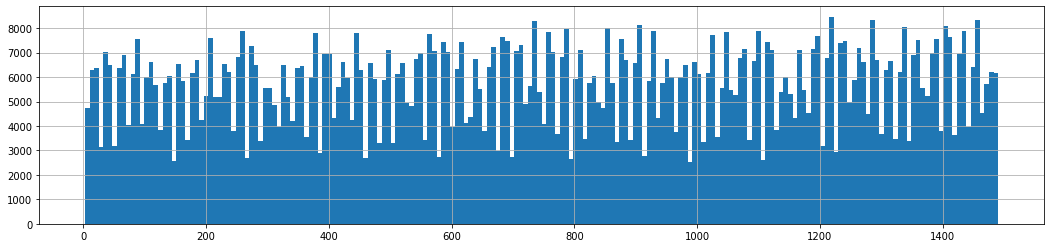

In [38]:
# Время объявлений в ходе всего периода сбора данных
history.hour.hist(bins=200, figsize=(18, 4))

<AxesSubplot:>

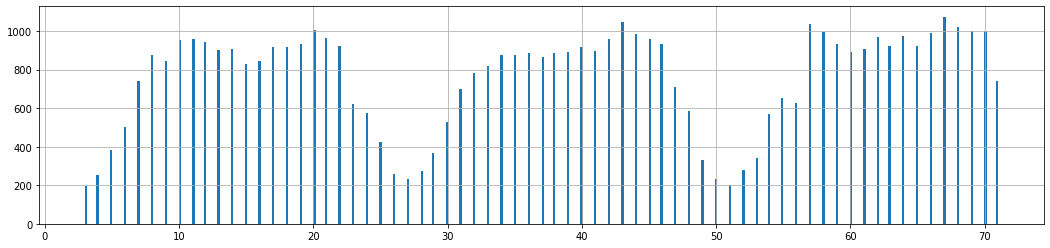

In [39]:
# Подробнее
history[history.hour < 72].hour.hist(bins=400, figsize=(18, 4))

<AxesSubplot:>

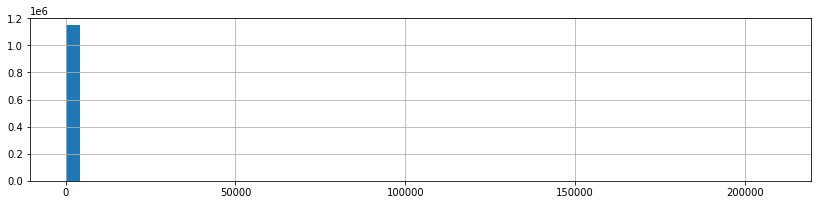

In [40]:
# Цены объявлений
history.cpm.hist(bins=50)

<AxesSubplot:>

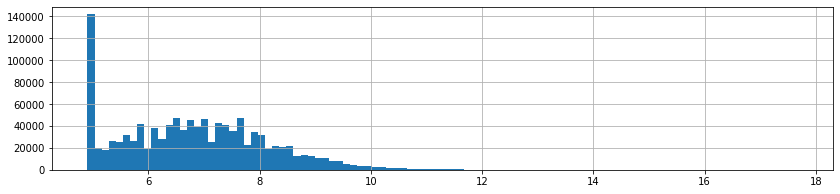

In [41]:
# Логарифмированные
cpms_log = history.cpm.apply(np.log2)
cpms_log.hist(bins=100)

<AxesSubplot:>

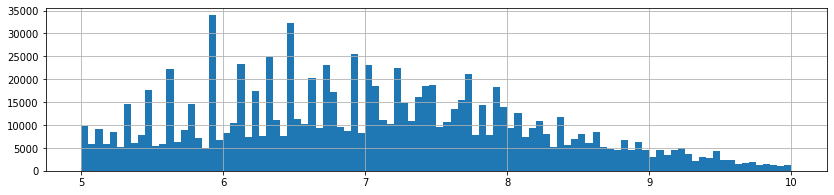

In [42]:
# Подробнее 
cpms_log[(cpms_log > 5) & (cpms_log < 10)].hist(bins=100)

21


Text(0, 0.5, 'Количество таких платформ')

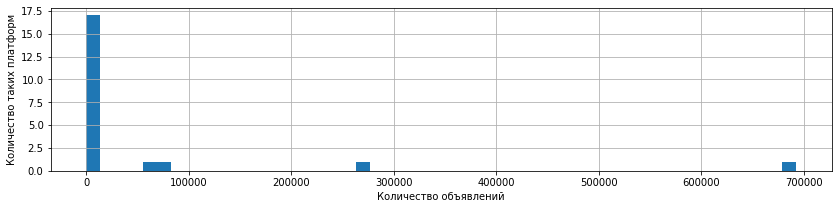

In [43]:
# Что за платформы для рекламы? Сколько их?

print(len(history.publisher.unique()))
vc = history.publisher.value_counts()
vc.hist(bins=50)
plt.xlabel('Количество объявлений')
plt.ylabel('Количество таких платформ')

In [44]:
history.publisher.value_counts() # есть мусорные платформы

1     692535
2     273037
3      72124
7      66134
9      10165
5       7263
6       5935
10      4232
11      4028
8       3625
4       2286
12      1922
16      1331
17      1095
14      1055
15       564
18       196
13       173
20        94
19        54
21         9
Name: publisher, dtype: int64

Text(0, 0.5, 'Количество платформ')

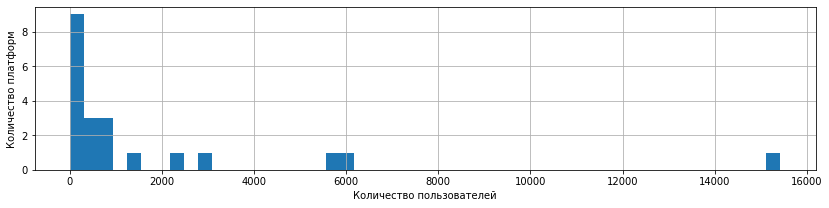

In [45]:
# Сколько уникальных пользователей на платформах?

history.groupby('publisher').user_id.apply(lambda users: len(set(users))).hist(bins=50)
plt.xlabel('Количество пользователей')
plt.ylabel('Количество платформ')

In [46]:
# Какой трафик на каждой платформе?

# Посчитаем для каждого часа: сколько постов было на каждой платформе?

n_publishers = len(history.publisher.unique())
posts_per_hour_by_publishers = []
TAKE_FIRST_N_HOURS = 24 * 4

for hour, hour_data in history[history.hour < TAKE_FIRST_N_HOURS].groupby('hour'):
    publishers_posts = hour_data.value_counts('publisher')
    
    counts = [0 for _ in range(n_publishers)]
    for pub_id, posts_n in list(publishers_posts.items()):
        counts[pub_id-1] = posts_n
        
    posts_per_hour_by_publishers.append([hour] + counts)

    
df = pd.DataFrame.from_records(posts_per_hour_by_publishers, columns=['hour'] + list(history.publisher.unique()))
df.head()

,hour,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,21,20
0,3,100,67,11,1,3,1,7,0,2,...,0,0,0,0,2,1,0,0,0,0
1,4,173,51,10,0,1,1,11,1,2,...,1,0,0,0,1,0,0,0,0,0
2,5,246,91,21,1,1,4,12,3,2,...,2,1,0,0,0,0,0,0,0,0
3,6,346,95,27,2,0,5,16,1,4,...,0,0,0,0,1,1,0,0,0,0
4,7,488,157,29,2,5,5,42,3,6,...,0,0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'Количество постов')

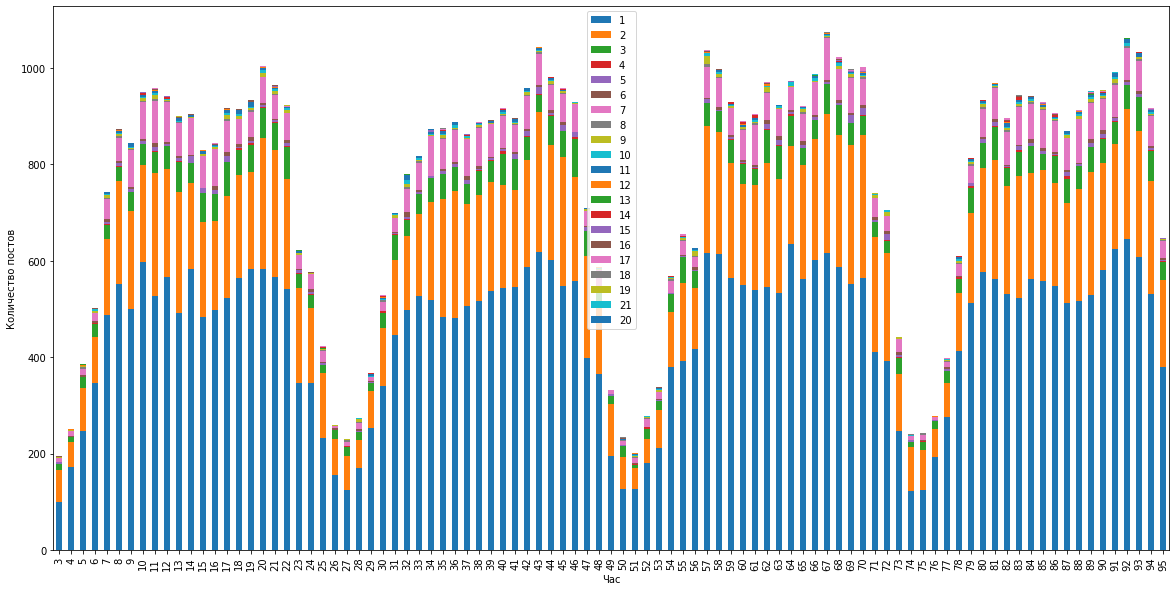

In [47]:
df.plot.bar(x='hour', stacked=True, figsize=(20, 10))
plt.xlabel('Час')
plt.ylabel('Количество постов')

<AxesSubplot:>

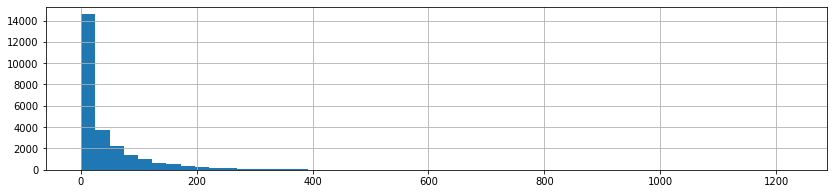

In [48]:
# И сколько постов посмотрел каждый пользователь?
vc = history.value_counts('user_id')
vc.hist(bins=50)

Text(0, 0.5, 'Количество таких пользователей')

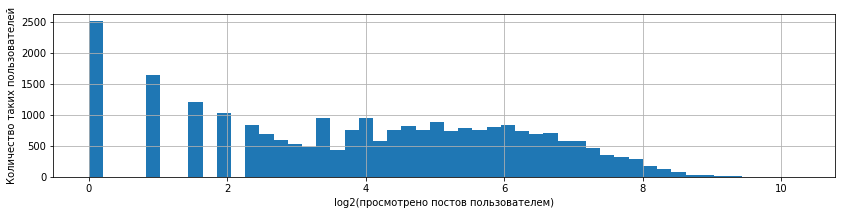

In [49]:
# Логарифмируем
np.log2(vc).hist(bins=50)
plt.xlabel('log2(просмотрено постов пользователем)')
plt.ylabel('Количество таких пользователей')

### Описание маркетинговой компании.

### ads.csv:
* ad_id - id объявления для сопоставления с целевой переменной
* cpm - для какой цены объявления нужно сделать прогноз
* hour_start - предположительное время запуска рекламного объявления
* hour_end - предположительное время остановки рекламного объявления. По итогу прогноз делается для рекламного объявление, которое будет запущено в период времени [hour_start, hour_end]
* publishers - на каких площадках объявление может быть показано
* audience_size - размер аудитории объявления, количество идентификаторов в поле user_ids
* user_ids – аудитория объявления – список пользователей, кому рекламодатель хочет показать объявление.

In [50]:
posts = pd.read_csv('ads.csv', sep=',')
posts = posts.set_index('ad_id')
posts.head(7)

,cpm,hour_start,hour_end,publishers,audience_size,user_ids
ad_id,,,,,,
0,220.0,1058,1153,"7,17",1906,"12,44,46,50,58,71,93,122,134,143,176,184,187,1..."
1,312.0,1295,1301,"3,18",1380,"29,81,98,102,165,167,195,205,218,231,242,263,3..."
2,70.0,1229,1249,"1,2,3,9,15,21",888,"12,23,25,29,45,85,92,124,156,190,272,334,456,5..."
3,240.0,1295,1377,"1,14",440,"44,122,187,209,242,255,312,345,382,465,513,524..."
4,262.0,752,990,"1,3,7,8",1476,"15,24,30,43,50,53,96,105,159,168,181,190,196,2..."
5,141.0,1288,1322,"3,8,11,15",856,"111,217,235,247,292,340,398,540,541,546,581,61..."
6,250.0,1198,1451,"1,3,7,10,13,18",336,"24,43,96,124,150,256,299,313,430,450,552,557,5..."


In [51]:
posts.shape[0]

1008

<AxesSubplot:>

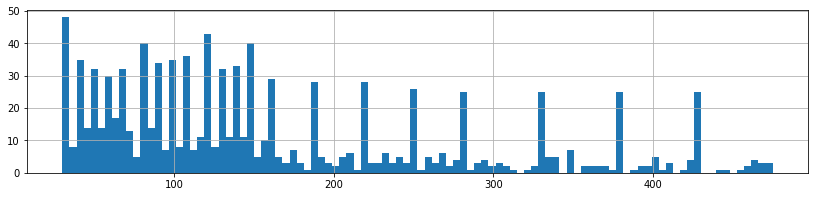

In [52]:
# Сколько по итогам аукциона стоит объявление
posts.cpm.hist(bins=100)

<AxesSubplot:>

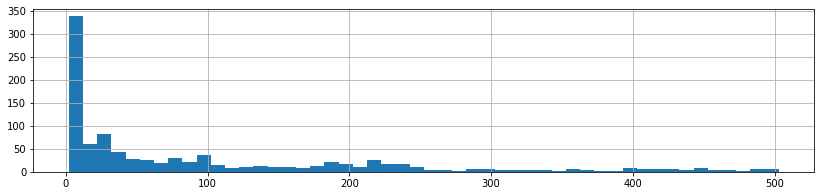

In [53]:
# Сколько часов длится рекламная компания

duration = (posts.hour_end - posts.hour_start)
duration.hist(bins=50)

Text(0, 0.5, 'количество объявлений')

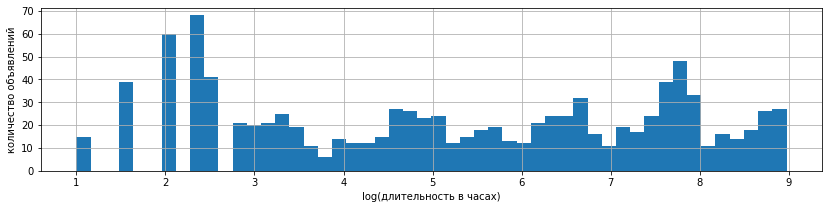

In [54]:
np.log2(duration).hist(bins=50)
plt.xlabel('log(длительность в часах)')
plt.ylabel('количество объявлений')

<AxesSubplot:>

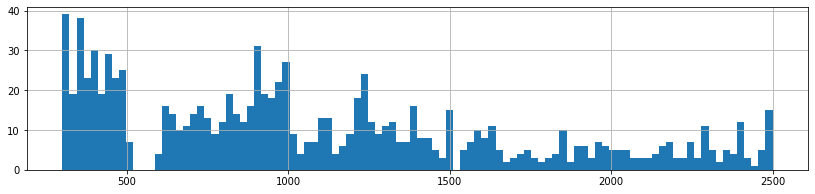

In [55]:
# На какую аудиторию крутилось объявление

posts.audience_size.hist(bins=100)

In [56]:
posts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 0 to 1007
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cpm            1008 non-null   float64
 1   hour_start     1008 non-null   int64  
 2   hour_end       1008 non-null   int64  
 3   publishers     1008 non-null   object 
 4   audience_size  1008 non-null   int64  
 5   user_ids       1008 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 55.1+ KB


### Данные для обучения/валидации

### target.csv:
* ad_id - id объявления для сопоставления с целевой переменной
* at_least_one - доля пользователей, которая увидит объявление хотя бы один раз

In [57]:
answers = pd.read_csv('target.csv', sep=',')
answers.head(7)

,ad_id,at_least_one
0,0,0.0430
1,1,0.0130
2,2,0.0878
3,3,0.2295
4,4,0.3963
5,5,0.0187
6,6,0.3839


<AxesSubplot:>

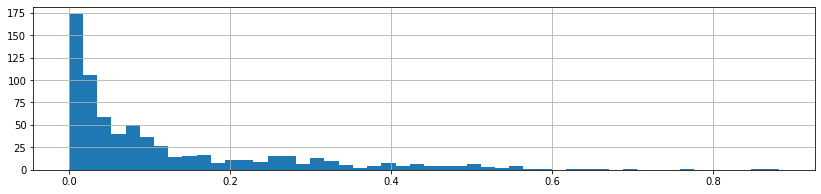

In [58]:
# Какая часть аудитории увидело объявление хоть раз
answers.at_least_one.hist(bins=50)

In [59]:
answers[answers.at_least_one == 0].shape[0] # кого-нибудь да и охватим.

0

### Пример ответа

### sample_solution:
* ad_id - id объявления для сопоставления с целевой переменной
* at_least_one - доля пользователей, которая увидит объявление хотя бы один раз


In [60]:
sample_solution = pd.read_csv('sample_solution.csv', sep=',')
sample_solution.head(7)

,ad_id,at_least_one
0,700,0.118536
1,701,0.118536
2,702,0.118536
3,703,0.118536
4,704,0.118536
5,705,0.118536
6,706,0.118536


### Извлечение признаков

In [61]:
posts.head()

,cpm,hour_start,hour_end,publishers,audience_size,user_ids
ad_id,,,,,,
0,220.0,1058,1153,"7,17",1906,"12,44,46,50,58,71,93,122,134,143,176,184,187,1..."
1,312.0,1295,1301,"3,18",1380,"29,81,98,102,165,167,195,205,218,231,242,263,3..."
2,70.0,1229,1249,"1,2,3,9,15,21",888,"12,23,25,29,45,85,92,124,156,190,272,334,456,5..."
3,240.0,1295,1377,"1,14",440,"44,122,187,209,242,255,312,345,382,465,513,524..."
4,262.0,752,990,"1,3,7,8",1476,"15,24,30,43,50,53,96,105,159,168,181,190,196,2..."


In [62]:
posts['del'] = posts['hour_end'] - posts['hour_start']

In [63]:
posts['del2'] = (posts['hour_end'] - posts['hour_start']) / 24

In [64]:
def make_harmonic_features(value, period=24):
    value *= 2 * np.pi / period
    return np.cos(value), np.sin(value)

make_harmonic_features(12)

(-1.0, 1.2246467991473532e-16)

In [65]:
posts['cos_start_time_24'], posts['sin_start_time_24'] = make_harmonic_features(posts['hour_start'])

In [66]:
posts['cos_end_time_24'], posts['sin_end_time_24'] = make_harmonic_features(posts['hour_end'])

In [67]:
answers.set_index('ad_id')

,at_least_one
ad_id,
0,0.0430
1,0.0130
2,0.0878
3,0.2295
4,0.3963
...,...
695,0.4272
696,0.1849
697,0.3963


In [68]:
posts['publishers_cnt'] = posts.publishers.apply(lambda s: len(s.split(',')))

In [69]:
history.head()

,hour,cpm,publisher,user_id
0,10,30.00,1,15661
1,8,41.26,1,8444
2,7,360.00,1,15821
3,18,370.00,1,21530
4,8,195.00,2,22148


In [70]:
def get_mean_user_cmp(user):
    return history.loc[history['user_id'] == user, 'cpm'].mean()

In [71]:
def get_publisher_cnt_user(publisher):
    return history.loc[history['publisher'] == publisher, 'user_id'].unique().size

In [72]:
users['mean_cpm'] = users['user_id'].apply(get_mean_user_cmp)

In [73]:
users = users.fillna(users.mean())

In [74]:
publisher_stat = pd.DataFrame(columns=['publisher', 'cnt_users'])

In [75]:
for publisher in range(1, 22):
    publisher_stat = publisher_stat.append(pd.Series([publisher,get_publisher_cnt_user(publisher)], index=['publisher','cnt_users']), ignore_index=True)

In [76]:
publisher_stat

,publisher,cnt_users
0,1,15426
1,2,5939
2,3,3011
3,4,739
4,5,580
5,6,749
6,7,5590
7,8,621
8,9,2298
9,10,1317


In [77]:
def get_mean_users_cmp(s):
    users_id = list(map(int, s.split(',')))
    return users.loc[users['user_id'].isin(users_id), 'mean_cpm'].mean()

In [78]:
def get_publishers_cnt_user(s):
    publishers = list(map(int, s.split(',')))
    return publisher_stat.loc[publisher_stat['publisher'].isin(publishers), 'cnt_users'].sum()

In [79]:
def get_cross_publishers_user(p):
    publishers = list(map(int, p['publishers'].split(',')))
    users_id = list(map(int, p['user_ids'].split(',')))
    return history.loc[history['publisher'].isin(publishers) & history['user_id'].isin(users_id), 'cpm'].sum()

In [180]:
def get_mean_users_cmp_by_time(c, u, p, s, e):
    users_ids = list(map(int, u.split(',')))
    publishers = list(map(int, p.split(',')))
    return history.loc[(history['user_id'].isin(users_ids)) & (history['hour'] >= s) & (history['hour'] <= e) & (history['publisher'].isin(publishers)) 
                       & (history['cpm'] <= c)
                       ,'cpm'].count()

In [82]:
#

In [84]:
posts['dur_x_audience'] = posts['audience_size'] * posts['del']
posts['log_dur_x_audience'] = np.log(posts['dur_x_audience'])
posts['cpm_x_duration'] = posts['cpm'] * posts['del']
posts['mean_users_cmp'] = posts['user_ids'].apply(lambda s: get_mean_users_cmp(s))
posts['get_cross_publishers_user'] = posts[['publishers', 'user_ids']].apply(lambda s: get_cross_publishers_user(s), axis=1)
posts['publishers_cnt_user'] = posts['publishers'].apply(lambda s: get_publishers_cnt_user(s))

In [181]:
posts['mean_users_cmp_by_time'] = posts[['cpm', 'user_ids', 'publishers', 'hour_start', 'hour_end']].apply(lambda s: get_mean_users_cmp_by_time(*s), axis=1)

In [183]:
posts

,cpm,hour_start,hour_end,publishers,audience_size,user_ids,del,del2,cos_start_time_24,sin_start_time_24,...,sin_end_time_24,publishers_cnt,dur_x_audience,log_dur_x_audience,cpm_x_duration,mean_users_cmp,get_cross_publishers_user,publishers_cnt_user,mean_users_cmp_by_time,audience_size_x_mean_users_cmp_x_del2
ad_id,,,,,,,,,,,,,,,,,,,,,
0,220.0,1058,1153,"7,17",1906,"12,44,46,50,58,71,93,122,134,143,176,184,187,1...",95,3.958333,0.866025,0.500000,...,2.588190e-01,2,181070,12.106639,20900.0,293.479033,1164136.73,5695,225,559371.036773
1,312.0,1295,1301,"3,18",1380,"29,81,98,102,165,167,195,205,218,231,242,263,3...",6,0.250000,0.965926,-0.258819,...,9.659258e-01,2,8280,9.021598,1872.0,179.636671,1898209.04,3051,42,247898.605382
2,70.0,1229,1249,"1,2,3,9,15,21",888,"12,23,25,29,45,85,92,124,156,190,272,334,456,5...",20,0.833333,0.258819,0.965926,...,2.588190e-01,6,17760,9.784704,1400.0,302.581066,6843663.12,26709,163,268691.986792
3,240.0,1295,1377,"1,14",440,"44,122,187,209,242,255,312,345,382,465,513,524...",82,3.416667,0.965926,-0.258819,...,7.071068e-01,2,36080,10.493494,19680.0,269.411238,1987777.62,15553,384,118540.944840
4,262.0,752,990,"1,3,7,8",1476,"15,24,30,43,50,53,96,105,159,168,181,190,196,2...",238,9.916667,-0.500000,0.866025,...,1.000000e+00,4,351288,12.769362,62356.0,354.247404,9991008.75,24648,5333,522869.167746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,127.0,1095,1154,"2,7,12,15,16",368,"38,50,143,237,456,649,653,698,881,893,1100,127...",59,2.458333,-0.707107,-0.707107,...,5.000000e-01,5,21712,9.985620,7493.0,277.948008,900066.05,12444,82,102284.866833
1004,90.0,1052,1056,"2,21",484,"1,4,61,212,230,348,356,372,429,431,462,540,593...",4,0.166667,0.500000,-0.866025,...,-3.919860e-14,2,1936,7.568379,360.0,257.956109,1207773.84,5941,10,124850.756985
1005,122.0,1058,1063,"2,5",704,"1,23,29,104,136,176,201,206,250,269,355,403,44...",5,0.208333,0.866025,0.500000,...,9.659258e-01,2,3520,8.166216,610.0,179.388233,3729239.46,6519,12,126289.315941


In [184]:
import seaborn as sns

In [185]:
def heatmap(data: pd.DataFrame):
    plt.figure(figsize=(10, 9))
    sns.heatmap(data.corr(), square=True, linecolor='white', annot=True)
    plt.yticks(rotation=30)
    plt.xticks(rotation=30)
    plt.show()

In [186]:
posts['audience_size_x_mean_users_cmp_x_del2'] = posts['audience_size'] * posts['mean_users_cmp']

In [214]:
# 'cos_start_time_24', 'cos_end_time_24', 'sin_start_time_24', 'sin_end_time_24'
X = posts[['cpm', 'del', 'del2', 'audience_size_x_mean_users_cmp_x_del2', 'mean_users_cmp_by_time', 
           'log_dur_x_audience', 'cpm_x_duration', 'mean_users_cmp', 'get_cross_publishers_user''publishers_cnt_user']]
for col in X.columns:
    X[col] = (X[col] - X[col].mean()) / X[col].std()
X_targert = X[X.index >= 700]
X = X[X.index < 700]
y = answers
y = y.set_index('ad_id')
y

C:\Users\Alex\AppData\Local\Temp/ipykernel_15364/3283143148.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = (X[col] - X[col].mean()) / X[col].std()


,at_least_one
ad_id,
0,0.0430
1,0.0130
2,0.0878
3,0.2295
4,0.3963
...,...
695,0.4272
696,0.1849
697,0.3963


In [215]:
X

,cpm,del,audience_size_x_mean_users_cmp_x_del2,mean_users_cmp_by_time,log_dur_x_audience,cpm_x_duration,mean_users_cmp,get_cross_publishers_user
ad_id,,,,,,,,
0,0.513173,-0.048882,0.949062,-0.271293,0.983134,0.174251,0.019507,-0.565333
1,1.333189,-0.753012,-0.260163,-0.341916,-0.814944,-0.542306,-0.727466,-0.431535
2,-0.823809,-0.642250,-0.179437,-0.295220,-0.370177,-0.560080,0.079230,0.469864
3,0.691437,-0.151733,-0.762366,-0.209933,0.042932,0.128309,-0.138413,-0.415210
4,0.887528,1.082473,0.807351,1.699956,1.369394,1.735403,0.418237,1.043525
...,...,...,...,...,...,...,...,...
695,-1.091205,2.767638,-0.364792,3.337390,2.005519,0.066549,-1.281257,0.466611
696,1.146011,-0.658074,-0.457349,-0.180990,-0.227653,-0.415549,-0.879708,-0.109933
697,-0.289016,0.781833,1.421267,2.230974,1.540807,0.366307,-0.010359,2.621539


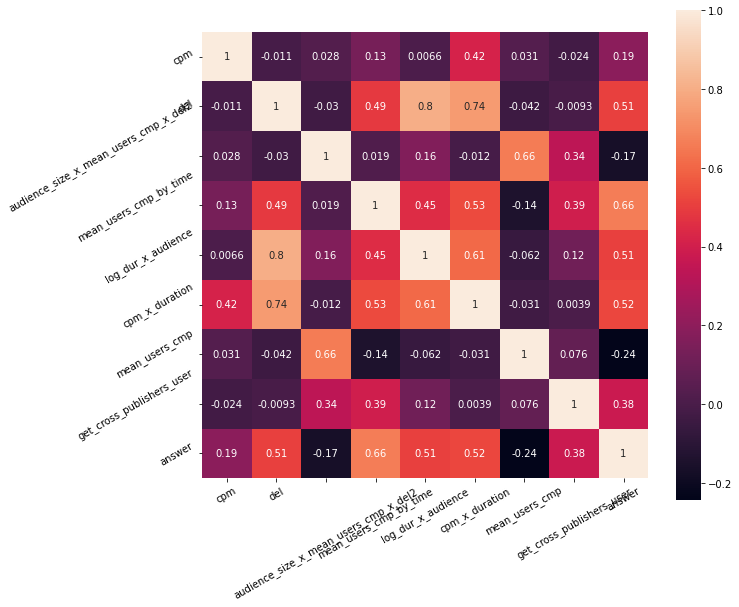

In [216]:
heatmap(X.assign(answer=answers['at_least_one']))

In [207]:
X

,cpm,del,audience_size_x_mean_users_cmp_x_del2,mean_users_cmp_by_time,log_dur_x_audience,cpm_x_duration,mean_users_cmp,get_cross_publishers_user
ad_id,,,,,,,,
0,0.495393,-0.057608,0.873533,-0.283610,0.981972,0.161010,-0.000274,-0.641368
1,1.305779,-0.765777,-0.262439,-0.360086,-0.827704,-0.549191,-0.730514,-0.488494
2,-0.825889,-0.654380,-0.186604,-0.309520,-0.380068,-0.566808,0.058111,0.541419
3,0.671564,-0.161049,-0.734220,-0.217164,0.035706,0.115474,-0.154656,-0.469841
4,0.865352,1.080236,0.740407,1.851036,1.370724,1.708312,0.389524,1.196868
...,...,...,...,...,...,...,...,...
695,-1.090146,2.775068,-0.360730,3.624197,2.010952,0.054263,-1.271899,0.537703
696,1.120800,-0.670294,-0.447680,-0.185821,-0.236625,-0.423559,-0.879345,-0.121040
697,-0.297377,0.777872,1.317132,2.426070,1.543242,0.351362,-0.029471,2.999861


#### Обучим линейную регрессию

In [67]:
from typing import Tuple
from sklearn.linear_model import LinearRegression

In [68]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error  
from sklearn.metrics import mean_squared_error
    
def cross_val(model, X, y, cv=5):
    ans = []
    kf = KFold(n_splits=cv, shuffle=True)
    kf.get_n_splits(X)
    for train_index, test_index in kf.split(X):
        X_train = X.iloc[train_index]
        X_test = X.iloc[test_index]
        y_train = y.iloc[train_index]
        y_test = y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        ans.append(mean_squared_error(y_pred, y_test))
    #print(ans)
    return ans

In [69]:
mse = np.mean(cross_val(LinearRegression(), X, y, cv=6))
print("Результат наивной регрессии: {:.5f}".format(mse))

Результат наивной регрессии: 0.00837


In [70]:
# L1
from sklearn.linear_model import Lasso
lambdas = np.arange(0.001, 0.2, 0.001)

lam_errors = [] 

for lam in lambdas:
    error = np.mean(cross_val(Lasso(alpha = lam), X, y, cv=5))
    lam_errors.append((lam, error))


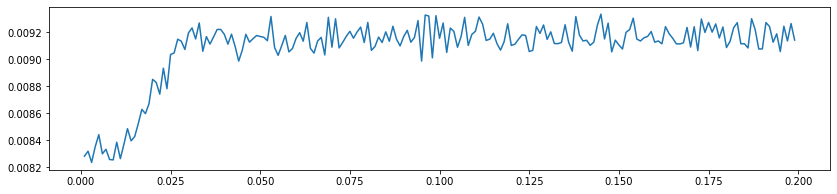

In [71]:
plt.plot(*zip(*lam_errors))

In [72]:
min_lam, min_cross_val_error = min(lam_errors, key=lambda x: x[1])

In [73]:
print(min_lam, min_cross_val_error)

0.003 0.00823640526950016


In [74]:
# L2
from sklearn.linear_model import Ridge

lambdas = np.arange(1000, 1400, 10)

lam_errors = []

for lam in lambdas:
    errors = np.mean(cross_val(Ridge(alpha=lam), X, y, cv=6))
    lam_errors.append((lam, errors))
    #print((lam, errors))



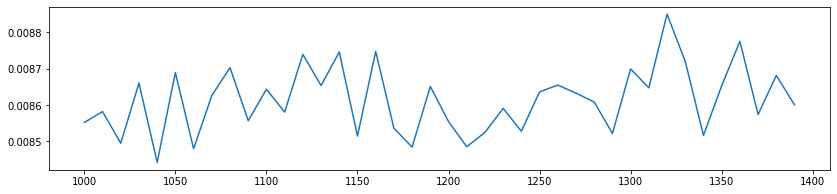

In [75]:
plt.plot(*zip(*lam_errors))

In [76]:
min_lam, min_cross_val_error = min(lam_errors, key=lambda x: x[1])
print(min_lam, min_cross_val_error)

1040 0.008442238474375295


In [77]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error  
    
def cross_val_proba(model, X, y, cv=5):
    ans = []
    kf = KFold(n_splits=cv, shuffle=True)
    kf.get_n_splits(X)
    ym = y['at_least_one']
    for train_index, test_index in kf.split(X):
        X_train = X.iloc[train_index]
        X_test = X.iloc[test_index]
        y_train = ym.iloc[train_index]
        y_train = y_train > 0.5
        y_test = ym.iloc[test_index]
        # print(X_train, y_train)
        model.fit(X_train, y_train)
        y_pred = model.predict_proba(X_test)[:, 1]
        ans.append(mean_squared_error(y_pred, y_test))
    return ans

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
weights = range(1, 10)

errors = []

for i in weights:
    for j in weights:
        error = np.mean(cross_val_proba(LogisticRegression(class_weight={0:i, 1:j}, max_iter=1000), X, y, cv=6))
        errors.append((i, j, error))

In [80]:
min_i, min_j, min_cross_val_error = min(errors, key=lambda x: x[2])

In [81]:
min_cross_val_error

0.02502833912616302

### CatBoost CatBoostRegressor

In [217]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error  
    
def cross_val_cat(model, X, y, cv=5):
    ans = []
    kf = KFold(n_splits=cv, shuffle=True)
    kf.get_n_splits(X)
    for train_index, test_index in kf.split(X):
        X_train = X.iloc[train_index]
        X_test = X.iloc[test_index]
        y_train = y.iloc[train_index]
        y_test = y.iloc[test_index]
        model.fit(X_train, y_train, logging_level='Silent')
        y_pred = model.predict(X_test)
        ans.append(mean_squared_error(y_pred, y_test))
    return ans

In [218]:
from catboost import CatBoostRegressor

In [219]:
np.mean(cross_val_cat(CatBoostRegressor(), X, y))

0.0014236139434699445

In [220]:
model = CatBoostRegressor()
# Fit model
model.fit(X, y, logging_level='Silent')
print(model.feature_importances_)
# Get predictions
preds = model.predict(X_targert)

# Ответ.

[ 3.28131049  2.14362283 13.62249291 59.82543948  5.41055859  3.25700632
  4.29610217  8.1634672 ]


In [ ]:
y_ans = sample_solution

In [ ]:
y_ans

In [169]:
best_model = Ridge(alpha=1070)

NameError: name 'Ridge' is not defined

In [ ]:
best_model.fit(X, y)

In [ ]:
y_ans['at_least_one'] = best_model.predict(X_targert)

In [221]:
y_ans['at_least_one'] = preds

In [222]:
y_ans

,ad_id,at_least_one
0,700,0.027273
1,701,0.010972
2,702,0.031669
3,703,0.001507
4,704,0.002624
...,...,...
303,1003,0.074084
304,1004,0.014218
305,1005,0.022544
306,1006,0.342842


In [223]:
y_ans.to_csv('solution.csv', index = False, header=True)